# **Specialised Machine Learning Techniques**

## **Cross-Validation Techniques**

Cross-validation is a statistical method used in machine learning to evaluate and improve the performance of models. It involves partitioning a dataset into multiple subsets and using these subsets to train and validate the model. Cross-validation is especially useful when the available data is limited, as it helps avoid overfitting by ensuring the model generalizes well to unseen data.

Here are the key cross-validation techniques:

### 1. **Hold-out Method**
- The dataset is split into two subsets: one for training and one for testing.
- **Example**: 80% of the data is used for training, and 20% is used for testing.
- **Advantages**: Simple and fast.
- **Disadvantages**: The evaluation result depends heavily on the specific split of data, which can lead to high variance.

### 2. **K-Fold Cross-Validation**
- The dataset is divided into **K** equally sized folds. The model is trained on **K-1** folds and tested on the remaining fold. This process is repeated **K** times, each time using a different fold for testing. The final performance is the average of the **K** results.
- **Example**: If K=5, the data is split into 5 subsets, and the model is trained 5 times, each time with a different fold as the test set.
- **Advantages**: More stable performance estimation since every data point is used for both training and testing.
- **Disadvantages**: Computationally expensive when K is large.

### 3. **Stratified K-Fold Cross-Validation**
- Similar to K-Fold Cross-Validation, but ensures that each fold has the same proportion of target labels (class distribution) as the original dataset. This is especially useful in cases of imbalanced datasets.
- **Advantages**: Better performance evaluation for imbalanced datasets.
- **Disadvantages**: More computational complexity compared to K-Fold.

### 4. **Leave-One-Out Cross-Validation (LOOCV)**
- A special case of K-Fold where **K** equals the number of data points. In each iteration, the model is trained on all data points except one, and that one data point is used for testing.
- **Advantages**: Utilizes the maximum amount of data for training.
- **Disadvantages**: Extremely computationally expensive, especially for large datasets.

### 5. **Leave-P-Out Cross-Validation (LPOCV)**
- Instead of leaving one data point out, **P** data points are left out in each iteration for testing, and the model is trained on the remaining data.
- **Advantages**: More thorough evaluation.
- **Disadvantages**: Exponentially increases computational cost as **P** increases.

### 6. **Time Series Cross-Validation (Rolling Cross-Validation)**
- For time-dependent data, traditional cross-validation techniques don’t work well since future data should not be used to predict past events. In this technique, data is split chronologically, and the model is trained on past data and tested on future data.
- **Example**: For each fold, the training set consists of all data up to a certain time point, and the test set contains data from the next time interval.
- **Advantages**: Suitable for time series data.
- **Disadvantages**: May not be useful for non-time-series data.

### 7. **Shuffle-Split Cross-Validation**
- The dataset is randomly shuffled, and a percentage of data is used for training and the rest for testing. This process is repeated several times.
- **Advantages**: Offers more flexibility in controlling the number of training/testing splits.
- **Disadvantages**: Similar to the hold-out method but with more randomness; might still lead to a biased evaluation.

### Advantages of Cross-Validation:
- **Reduces Overfitting**: It provides a more generalized evaluation of the model, reducing the chance of overfitting.
- **Better Performance Estimation**: Cross-validation offers a more accurate estimate of model performance by using multiple training and testing splits.
  
### Disadvantages of Cross-Validation:
- **Computationally Expensive**: For large datasets and models, cross-validation can be computationally expensive, especially with techniques like K-Fold or LOOCV.
- **Time-Consuming**: Depending on the number of folds and dataset size, it can take a significant amount of time to compute the results.

### Example: K-Fold Cross-Validation in Python
```python
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Dummy dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 1, 0, 1, 0])

kf = KFold(n_splits=5)
model = LogisticRegression()

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
```

This code splits the dataset into 5 folds, trains on 4, and tests on the remaining fold, repeating the process 5 times. The performance is averaged over all splits.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a RandomForest classifier
clf = RandomForestClassifier(random_state=42)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

K-Fold Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Accuracy: 0.9600000000000002


---

## **ROC AUC curve**

The **ROC AUC curve** is a key evaluation metric used in machine learning, especially for binary classification problems. It measures the performance of a classifier by visualizing its ability to distinguish between classes. Let's break it down:

### 1. **ROC (Receiver Operating Characteristic) Curve:**
The ROC curve is a graph that plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at different threshold settings of a classifier. Here's how we define these terms:

- **True Positive Rate (TPR)** (also known as **Recall** or **Sensitivity**):  
  \[
  TPR = \frac{TP}{TP + FN}
  \]
  It represents the proportion of actual positives correctly identified by the model.

- **False Positive Rate (FPR)**:  
  \[
  FPR = \frac{FP}{FP + TN}
  \]
  It represents the proportion of actual negatives that are incorrectly classified as positives.

### Key Points of ROC Curve:
- **X-axis**: FPR (False Positive Rate)
- **Y-axis**: TPR (True Positive Rate)

Each point on the ROC curve represents a **different decision threshold**. By changing the threshold, we can move between different points on the curve. A perfect classifier would have a point in the top-left corner of the ROC space, meaning a TPR of 1 and FPR of 0.

### 2. **AUC (Area Under the Curve):**
- The **AUC** is the area under the ROC curve, which gives us a single scalar value to summarize the model's performance.
- The AUC score ranges from 0 to 1:
  - **AUC = 1**: Perfect classifier.
  - **AUC = 0.5**: Random classifier (like flipping a coin).
  - **AUC < 0.5**: Worse than random (likely, the model is inverted).

### Why is ROC AUC important?
- It is **threshold-independent**: The ROC AUC provides a measure of the model's performance across all classification thresholds, rather than being dependent on a specific threshold value.
- It helps evaluate the model’s ability to **separate classes**. A high ROC AUC score means the model can correctly distinguish between positive and negative classes.

### Example:

1. **True Positives (TP)**: The model correctly predicts the positive class.
2. **False Positives (FP)**: The model incorrectly predicts the positive class.
3. **True Negatives (TN)**: The model correctly predicts the negative class.
4. **False Negatives (FN)**: The model incorrectly predicts the negative class.

Suppose you are building a classifier to predict if a patient has a disease (positive class) or not (negative class). For each prediction threshold (between 0 and 1), the model will classify patients as either having the disease or not. The ROC curve shows how the true positive rate and false positive rate change as the threshold changes.

### Code Example in Python:
You can use the `roc_curve` and `auc` functions from `sklearn` to generate an ROC AUC curve.

```python
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate a random binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # We need probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
```

### Interpreting the ROC AUC:
- If the curve hugs the **top-left corner** of the plot, it indicates that the model has a **high TPR and a low FPR**, which is desirable.
- If the ROC AUC is close to 1, the classifier is performing well.
- If the ROC curve is close to the **diagonal line**, the model is performing no better than random chance.

### Pros and Cons of ROC AUC:

**Pros:**
- **Threshold independent**: It evaluates model performance across all thresholds.
- **Class imbalance handling**: Works well even with imbalanced datasets because it focuses on the ranking of predictions, not their absolute values.
  
**Cons:**
- **Misleading for highly imbalanced datasets**: In some cases, when the positive class is extremely rare, ROC AUC may provide overly optimistic scores.
- **Performance interpretation**: Two models with similar AUC values can behave very differently depending on how the thresholds are set.

### Conclusion:
The **ROC AUC curve** is a powerful tool for evaluating classification models, particularly when class distributions are balanced. It allows you to visualize and compare different models and thresholds to find the optimal balance between false positives and true positives.

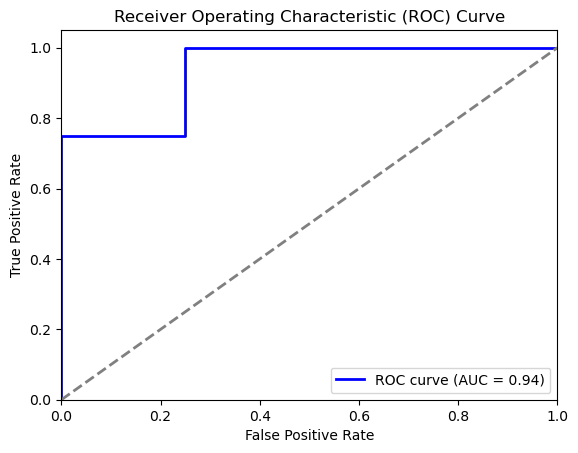

Threshold: 0.20
Confusion Matrix:
[[3 1]
 [0 4]]
True Positives (TP): 4
False Positives (FP): 1
True Negatives (TN): 3
False Negatives (FN): 0
True Positive Rate (TPR): 1.00
False Positive Rate (FPR): 0.25


Threshold: 0.40
Confusion Matrix:
[[3 1]
 [1 3]]
True Positives (TP): 3
False Positives (FP): 1
True Negatives (TN): 3
False Negatives (FN): 1
True Positive Rate (TPR): 0.75
False Positive Rate (FPR): 0.25


Threshold: 0.50
Confusion Matrix:
[[3 1]
 [1 3]]
True Positives (TP): 3
False Positives (FP): 1
True Negatives (TN): 3
False Negatives (FN): 1
True Positive Rate (TPR): 0.75
False Positive Rate (FPR): 0.25


Threshold: 0.60
Confusion Matrix:
[[4 0]
 [1 3]]
True Positives (TP): 3
False Positives (FP): 0
True Negatives (TN): 4
False Negatives (FN): 1
True Positive Rate (TPR): 0.75
False Positive Rate (FPR): 0.00


Threshold: 0.80
Confusion Matrix:
[[4 0]
 [1 3]]
True Positives (TP): 3
False Positives (FP): 0
True Negatives (TN): 4
False Negatives (FN): 1
True Positive Rate (TPR):

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Sample data
weights = np.array([50, 55, 60, 65, 70, 85, 90, 100]).reshape(-1, 1)
obese = np.array([0, 0, 0, 1, 0, 1, 1, 1])

# Train logistic regression model
model = LogisticRegression()
model.fit(weights, obese)

# Predict probabilities
probs = model.predict_proba(weights)[:, 1]

# Define function to print confusion matrix for a given threshold
def print_confusion_matrix(threshold):
    predictions = (probs >= threshold).astype(int)
    cm = confusion_matrix(obese, predictions)
    print(f"Threshold: {threshold:.2f}")
    print("Confusion Matrix:")
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positive Rate (TPR): {tp / (tp + fn):.2f}")
    print(f"False Positive Rate (FPR): {fp / (fp + tn):.2f}")
    print("\n")

# Different thresholds to demonstrate changes in confusion matrix
thresholds = [0.2, 0.4, 0.5, 0.6, 0.8]

# Calculate ROC curve for plotting
fpr, tpr, roc_thresholds = roc_curve(obese, probs)
auc = roc_auc_score(obese, probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix for each threshold
for threshold in thresholds:
    print_confusion_matrix(threshold)

---

## **Encoding Techniques in Machine Learning**

In machine learning, most algorithms require numeric input. However, categorical data, like city names or colors, is often represented as text or labels. **Encoding techniques** are used to transform these categorical features into a format that can be provided to machine learning algorithms.

### 1. **Label Encoding**
Label Encoding assigns a unique integer to each category in the data. This method transforms categorical values into numerical labels. It’s useful when the categorical data has some order or ranking. However, it can sometimes create unintended ordinal relationships between categories.

#### How it works:
- Each unique category is assigned an integer value starting from 0.
- No new features are created, and the original categorical feature is simply replaced by integer values.

#### Example:
Imagine you have a column `Colors` with three categories: "Red," "Blue," and "Green."

| Color  | Label Encoded |
|--------|---------------|
| Red    | 0             |
| Blue   | 1             |
| Green  | 2             |

#### Pros:
- Simple and memory-efficient as it does not increase the dimensionality.
  
#### Cons:
- Imposes an ordinal relationship between categories, which might mislead the model if there is no actual ranking.

#### Code Example:
```python
from sklearn.preprocessing import LabelEncoder

# Example data
data = ['Red', 'Blue', 'Green', 'Blue', 'Red']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_data = label_encoder.fit_transform(data)

print(encoded_data)
```

### 2. **One-Hot Encoding**
One-Hot Encoding transforms categorical variables into multiple binary columns, where each column represents a unique category. If a category is present in a row, the corresponding column gets a value of 1, and all other columns get a value of 0.

#### How it works:
- For each unique category, a new column is created.
- Each column represents one of the categories, and it has binary values (0 or 1).

#### Example:
Using the same `Colors` column with values: "Red," "Blue," and "Green":

| Color  | Red | Blue | Green |
|--------|-----|------|-------|
| Red    |  1  |   0  |   0   |
| Blue   |  0  |   1  |   0   |
| Green  |  0  |   0  |   1   |

#### Pros:
- Avoids introducing ordinal relationships, making it better suited for nominal categorical features.
  
#### Cons:
- Can lead to **high-dimensionality** if there are many unique categories (curse of dimensionality).
- Memory-inefficient when dealing with a large number of categories.

#### Code Example:
```python
import pandas as pd

# Example data
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Perform One-Hot Encoding
one_hot_encoded_data = pd.get_dummies(df['Color'])

print(one_hot_encoded_data)
```

### When to Use:
- **Label Encoding**: Best suited for ordinal categorical variables where the categories have a meaningful order. For example, "Low," "Medium," and "High."
- **One-Hot Encoding**: Ideal for **nominal** categorical variables (no natural order), such as colors, product categories, or city names. It’s commonly used in tree-based models and deep learning algorithms.

### Which Technique to Use?

- **Use Label Encoding** when there’s an **ordinal relationship** between categories (i.e., the categories have some inherent ranking, like `low`, `medium`, `high`).
  
- **Use One-Hot Encoding** when the categories are **nominal** (no order between them) and there’s no relationship or ranking between the categories.

### Summary:
- **Label Encoding** is simple and works well when the categorical feature has a natural order.
- **One-Hot Encoding** is preferable for features that do not have an inherent order but can increase the feature space significantly.

Each technique is useful in different situations, and the choice depends on the specific nature of the categorical data and the machine learning model being used.

In [3]:
import pandas as pd
data = {'Color':['Red', 'Blue', 'Green', 'Blue', 'Red']}
dataframe = pd.DataFrame(data)
print(dataframe)

   Color
0    Red
1   Blue
2  Green
3   Blue
4    Red


In [4]:
one_hot_encoded_df = pd.get_dummies(dataframe, columns=['Color'])
print(one_hot_encoded_df)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False
4       False        False       True


In [5]:
## avoid the redundant information and get rid of the multicollinearity
one_hot_encoded_df = pd.get_dummies(dataframe, columns=['Color'], drop_first=True)
print(one_hot_encoded_df)

   Color_Green  Color_Red
0        False       True
1        False      False
2         True      False
3        False      False
4        False       True


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
file_path = '../Day_28/Session Notes Encoding Tecgniques/carprices.csv'
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Original Data:\n", car_data.head(14))

Original Data:
                 Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5


In [9]:
car_data.dtypes

Car Model        object
Mileage           int64
Sell Price($)     int64
Age(yrs)          int64
dtype: object

In [10]:
car_data.shape

(13, 4)

In [11]:
# Extract the 'Car Model' column
car_models = car_data[['Car Model']]

# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(car_models)

# Convert one-hot encoding result to DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Car Model']))

# Combine the one-hot encoded columns with the original data
car_data_one_hot_encoded = pd.concat([car_data, one_hot_encoded_df], axis=1)

# Display the one-hot encoded data
print("\nOne-Hot Encoded Data:\n", car_data_one_hot_encoded.head(14))


One-Hot Encoded Data:
                 Car Model  Mileage  Sell Price($)  Age(yrs)  \
0                  BMW X5    69000          18000         6   
1                  BMW X5    35000          34000         3   
2                  BMW X5    57000          26100         5   
3                  BMW X5    22500          40000         2   
4                  BMW X5    46000          31500         4   
5                 Audi A5    59000          29400         5   
6                 Audi A5    52000          32000         5   
7                 Audi A5    72000          19300         6   
8                 Audi A5    91000          12000         8   
9   Mercedez Benz C class    67000          22000         6   
10  Mercedez Benz C class    83000          20000         7   
11  Mercedez Benz C class    79000          21000         7   
12  Mercedez Benz C class    59000          33000         5   

    Car Model_Audi A5  Car Model_BMW X5  Car Model_Mercedez Benz C class  
0                 

In [12]:
# Apply Label Encoding
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(car_models['Car Model'])

# Add the label encoded column to the original data
car_data_label_encoded = car_data.copy()
car_data_label_encoded['Car Model (Label Encoded)'] = label_encoded

# Display the label encoded data
print("\nLabel Encoded Data:\n", car_data_label_encoded.head(14))


Label Encoded Data:
                 Car Model  Mileage  Sell Price($)  Age(yrs)  \
0                  BMW X5    69000          18000         6   
1                  BMW X5    35000          34000         3   
2                  BMW X5    57000          26100         5   
3                  BMW X5    22500          40000         2   
4                  BMW X5    46000          31500         4   
5                 Audi A5    59000          29400         5   
6                 Audi A5    52000          32000         5   
7                 Audi A5    72000          19300         6   
8                 Audi A5    91000          12000         8   
9   Mercedez Benz C class    67000          22000         6   
10  Mercedez Benz C class    83000          20000         7   
11  Mercedez Benz C class    79000          21000         7   
12  Mercedez Benz C class    59000          33000         5   

    Car Model (Label Encoded)  
0                           1  
1                           1  